### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

In [1]:
import numpy as np
y=np.array([18,34,30,36,16,15,40,42,20,26])
y_pred=np.array([16.3,30,30,39,16.3,16.3,40,39,20,30])
np.mean((y-y_pred)**2)

5.4670000000000005

In [2]:
-(.25*np.log2(.25)+.75*np.log2(.75))

0.8112781244591328

In [3]:
0.8112781244591328*(4/7)

0.46358749969093305

In [4]:
-((1/4)*np.log2(1/4)+(3/4)*np.log2(3/4))

0.8112781244591328

In [5]:
0.8112781244591328*(4/7)

0.46358749969093305

In [6]:
.4635+.3935

0.857

In [7]:
0.9182958340544896*(3/7)

0.39355535745192405

In [8]:
0.9852-0.7871

0.19809999999999994

In [9]:
0.39355535745192405+0.46358749969093305

0.8571428571428571

In [10]:
import numpy as np

In [11]:
#entropy at root
-((3/7)*np.log2(3/7)+(4/7)*np.log2(4/7))

0.9852281360342515

In [12]:
#entropy at left branch depth2
-((1/4)*np.log2(1/4)+(3/4)*np.log2(3/4))

0.8112781244591328

In [13]:
0.8112781244591328*(.5)

0.4056390622295664

In [14]:
#weighted entropy
0.9182958340544896*(3/10)

0.27548875021634683

In [15]:
#entropy at right branch depth1
-((3/7)*np.log2(3/7)+(4/7)*np.log2(4/7))

0.9852281360342515

In [16]:
-((3/8)*np.log2(3/8)+(5/8)*np.log2(5/8))

0.954434002924965

In [17]:
0.9544340029249649*(8/10)

0.763547202339972

In [18]:
0.9852281360342515*(7/10)

0.6896596952239761

In [19]:
#tot entropy at depth1
0.6896596952239761+0.27548875021634683

0.965148445440323

In [20]:
#Information gain
1-0.965148445440323

0.034851554559677034

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# resample the dataset
#from sklearn.utils import resample
#from sklearn.utils import shuffle

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

import random

In [22]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [23]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

#### Load the csv file

In [24]:
# load the csv file
df_employee = pd.read_csv('/content/drive/My Drive/SLC/emp_attrition.csv')

# display the first two observations
df_employee.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/SLC/emp_attrition.csv'

In [ ]:
df_employee.shape

In [ ]:
# check data types of variables
df_employee.dtypes

In [ ]:
# check the size of data
df_employee.shape

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Check the outliers in all the variables and treat them using IQR technique.**

In [ ]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_employee.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variable 'MonthlyIncome' has a quite large range as compared to the other variables. Thus, it is difficult to see the outliers in other variables. So, we plot the boxplots of independent variables again by not considering the variable 'MonthlyIncome'**

In [ ]:
# plot boxplots of all the numeric variables except 'MonthlyIncome'
df_employee[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables (except "MonthlyIncome")', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that some of the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

Let us use the IQR method to remove the outliers.

In [ ]:
# calculate the first quartile
Q1 = df_employee.quantile(0.25)

#calculate the third quartile
Q3 = df_employee.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the dataframe
df_employee = df_employee[~((df_employee < (Q1 - 1.5 * IQR)) | (df_employee > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the row index
df_employee = df_employee.reset_index(drop=True)

# check the shape of the data
df_employee.shape

### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Split the dependent and independent variables.

In [ ]:
# store the target variable "Attrition" in a dataframe 'df_target'
df_target = df_employee['Attrition']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column "Attrition" using drop()
# 'axis = 1' drops the specified column
df_feature = df_employee.drop('Attrition', axis = 1)

In [ ]:
# if the value in the target variable is 'Yes' then replace it with 1 else with 0
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0
        
# change the datatype of the target variable to integer
df_target = df_target.astype('int')

#### Filter numerical and categorical variables.

In [ ]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

In [ ]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [ ]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables.

In [ ]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num, dummy_var], axis = 1)

# display first five observations
X.head()

In [ ]:
X.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# split the target and independent variables
# store all the relevant independent variables in a dataframe 'X_subset' 
X_subset = X.iloc[:,[2,6]]

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X_subset, df_target, random_state = 10, test_size = 0.3)

# instantiate the 'DecisionTreeClassifier' object using 'gini' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeClassifier(random_state=10)

# fit the model using fit() on train data
decision_tree = decision_tree.fit(X_train, y_train)

# predict the attrition for test set
y_pred = decision_tree.predict(X_test)

# pass the actual and predicted target values to the accuracy_score()
print("Test_Accuracy:",accuracy_score(y_test, y_pred))

In [ ]:
#calculate training accuracy
y_pred_train = decision_tree.predict(X_train)

# pass the actual and predicted target values to the accuracy_score()
print("Test_Accuracy:",accuracy_score(y_train, y_pred_train))

In [ ]:
#What is the acc of training records
y_pred_train=decision_tree.predict(X_train)
print("Training_Accuracy:",accuracy_score(y_train, y_pred_train))

In [ ]:
X.shape

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

# instantiate the 'DecisionTreeClassifier' object using 'gini' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_full = DecisionTreeClassifier(random_state=10)

# fit the model using fit() on train data
decision_tree_full = decision_tree_full.fit(X_train, y_train)

# predict the attrition for test set
y_pred_full = decision_tree_full.predict(X_test)

# predict the attrition for test set
y_pred = decision_tree_full.predict(X_test)

# pass the actual and predicted target values to the accuracy_score()
print("Test_Accuracy:",accuracy_score(y_test, y_pred))


In [ ]:
#What is the acc of training records
y_pred_train=decision_tree_full.predict(X_train)
print("Training_Accuracy:",accuracy_score(y_train, y_pred_train))

In [ ]:
decision_tree_full.feature_importances_

In [ ]:

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree_full.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False)

Thus we can see that `Age`, `MonthlyIncome` and `DistanceFromHome` are the most import features when predicting whether or not an employee will leave the company.

In [ ]:
y_test.value_counts()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_full)

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_full),4)))
                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

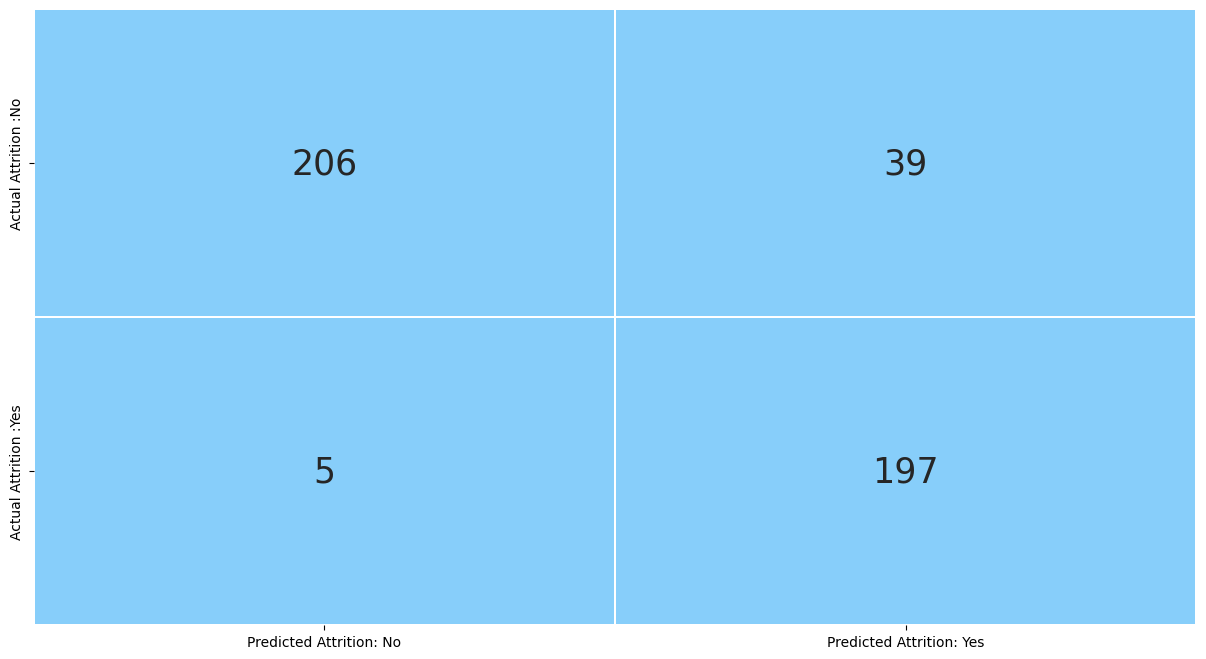

In [26]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_full)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

In [ ]:
sns.heatmap(conf_matrix, annot = True)

In [ ]:
y_test.value_counts()

0    245
1    202
Name: Attrition, dtype: int64

In [ ]:
#sensitivity
197/(202)

0.9752475247524752

In [ ]:
#specificity
206/245

0.8408163265306122

In [ ]:
44/(447)

0.09843400447427293

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# True Negative from confusion matrix
TN = cm[0][0]
# True Positive from confusion matrix
TP = cm[1][1]
# False Positive from confusion matrix
FP = cm[0][1]
# False Negative from confusion matrix
FN = cm[1][0]

# add all the values of a confusion matrix
total = TN + TP + FP + FN

# find the percentage of correctly classified observations
# round the result upto 2 decimal points
correct_classified_percentage = ((TN+TP)/total)*100
print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2))

# find the percentage of  misclassified observations
# round the result upto 2 decimal points
misclassified_percentage = ((FP+FN)/total)*100
print("Percentage of misclassified observations: ", round(misclassified_percentage, 2))

# find the specificity
# round the result upto 4 decimal points
specificity = TN/(TN+FP)
print("\nSpecificity: ", round(specificity, 4))

# find the sensitivity
# round the result upto 4 decimal points
sensitivity = TP/(TP+FN)
print("Sensitivity: ", round(sensitivity, 4))

Percentage of correctly classified observations:  90.16
Percentage of misclassified observations:  9.84

Specificity:  0.8408
Sensitivity:  0.9752


**Intrepretation:** The is a difference between the sensitivity and the specificity values. But we can say that the model performance is good. For a better model, the values of sensitivity and specificity should be balanced.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
y_train.value_counts()

0    570
1    470
Name: Attrition, dtype: int64

In [28]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

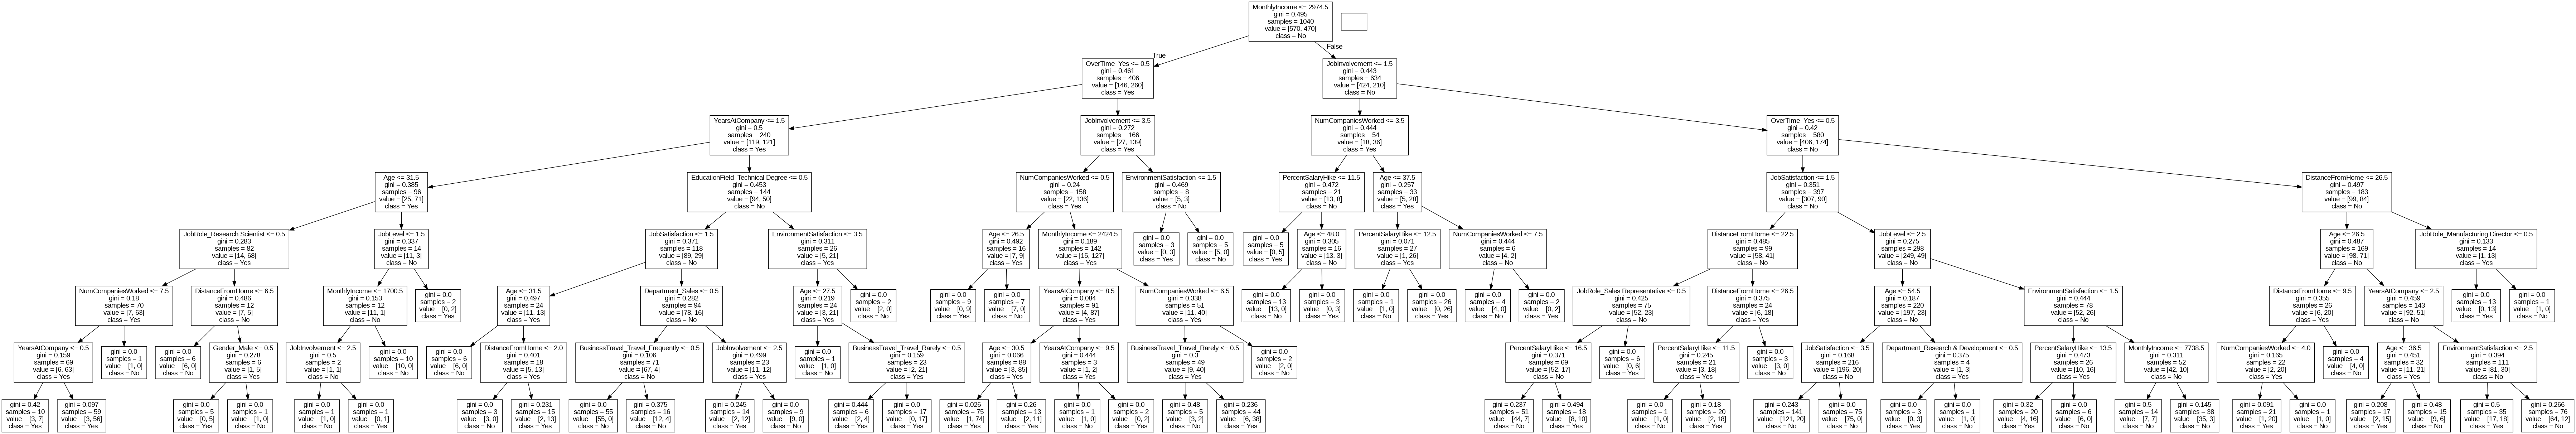

In [37]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# set 'max_leaf_nodes = 5' to build the tree with maximim 5 leaf/terminal nodes
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(max_depth=7,random_state=10)

# fit the model using fit() on train data
dt_model = decision_tree_classification.fit(X_train, y_train)

# plot a decision tree
# save the column names in 'labels'
feat_names = X_train.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(dt_model, feature_names = feat_names,class_names = ["No","Yes"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

In [38]:
dt_reg_pred_train=decision_tree_classification.predict(X_train)
dt_reg_acc=accuracy_score(y_train,dt_reg_pred_train)
print(dt_reg_acc)

0.8884615384615384


In [39]:
dt_reg_pred_test=decision_tree_classification.predict(X_test)
dt_reg_acc=accuracy_score(y_test,dt_reg_pred_test)
print(dt_reg_acc)

0.8120805369127517


In [34]:
train_char_label = ['No', 'Yes']
DT_Tree_File = open('/content/drive/My Drive/Python for ML-Mahesh Anand/Attr_tree.dot','w')
dot_data = tree.export_graphviz(decision_tree_full, out_file=DT_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
DT_Tree_File.close()

In [ ]:
train_char_label = ['No', 'Yes']
DT_Tree_File = open('Attr_tree.dot','w')
dot_data = tree.export_graphviz(decision_tree_full, out_file=DT_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
DT_Tree_File.close()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Split the data into train and test set for upcoming questions

In [40]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

In [44]:
# instantiate the 'DecisionTreeClassifier'
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_model = DecisionTreeClassifier(random_state=10)

# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing Decision Tree Classification
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'accuracy' for accuracy
kf=KFold(n_splits=10,shuffle=True,random_state=0)
scores = cross_val_score(estimator = decision_tree_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = kf, 
                         scoring = 'roc_auc')

# get the average of the accuracy obtained after 10 fold cross validation
# round the result upto 2 decimal points
print("Mean accuracy after 10 fold cross validation: ", round(scores.mean(), 2))

Mean accuracy after 10 fold cross validation:  0.89


In [45]:
scores

array([0.86037037, 0.91154423, 0.87814815, 0.90297369, 0.88988095,
       0.83954802, 0.91803279, 0.87893553, 0.87959184, 0.90592593])

In [ ]:
np.std(scores,ddof=1)

0.028720352768094003

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [56]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(4,10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_model = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_model, 
                         param_grid = hyp_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Decision Tree Classifier: ', tree_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 4} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
from sklearn.model_selection import KFold

In [57]:
# instantiate the 'DecisionTreeClassifier' object using 'gini' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_tuned_model = DecisionTreeClassifier(criterion = tree_grid.best_params_['criterion'], 
                                                   max_depth = tree_grid.best_params_['max_depth'], 
                                                   min_samples_split = tree_grid.best_params_['min_samples_split'])

# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing Decision Tree Classification
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'accuracy' for accuracy
kf=KFold(n_splits=10,shuffle=True,random_state=0)
scores = cross_val_score(estimator = decision_tree_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = kf, 
                         scoring = 'roc_auc')

# get the average of the ROC-AUC scores obtained after 10 fold cross validation
# round the result upto 2 decimal points
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Mean ROC-AUC score after 10 fold cross validation:  0.88


In [58]:
np.std(scores,ddof=1)

0.02462568988385461

In [ ]:
(.89-.87)/.89

0.02247191011235957

In [ ]:
(0.02872-0.02323)/0.02872

0.19115598885793866

In [ ]:
X_train.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'OverTime_Yes'],
      dtype='object')

In [59]:
X_train.shape

(1040, 30)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
columns = list(X_train.columns)

# select random features from the columns
random.choices(columns, k=20)

['PercentSalaryHike',
 'PercentSalaryHike',
 'Age',
 'YearsAtCompany',
 'BusinessTravel_Travel_Frequently',
 'EducationField_Life Sciences',
 'EnvironmentSatisfaction',
 'JobRole_Research Scientist',
 'JobRole_Manufacturing Director',
 'OverTime_Yes',
 'EducationField_Life Sciences',
 'EducationField_Life Sciences',
 'EducationField_Technical Degree',
 'JobRole_Manufacturing Director',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'NumCompaniesWorked',
 'JobLevel',
 'YearsAtCompany',
 'JobRole_Human Resources']

In [64]:
# get the columns from X_train
columns = list(X_train.columns)

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 1
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_1 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_1 = dt_model_1.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_1
y_pred_1 = dt_model_1.predict(X_test[sample_features])
###################################################################################

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 2
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_2 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_2 = dt_model_2.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_2
y_pred_2 = dt_model_2.predict(X_test[sample_features])
###################################################################################

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 3
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_3 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_3 = dt_model_3.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_3
y_pred_3 = dt_model_3.predict(X_test[sample_features])
###################################################################################

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 4
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_4 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_4 = dt_model_4.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_4
y_pred_4 = dt_model_4.predict(X_test[sample_features])
###################################################################################

# select random features from the columns
sample_features = random.choices(columns, k=20)

# Decision Tree Model 5
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model_5 = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
dt_model_5 = dt_model_5.fit(X_train[sample_features], y_train)

# predict the attrition for test set using dt_model_5
y_pred_5 = dt_model_5.predict(X_test[sample_features])
###################################################################################

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
# create a dataframe "model_predictions_df" using the predictions obtained from the decision tree models
model_predictions_df = pd.DataFrame({"y_pred_1": y_pred_1, 
                                     "y_pred_2": y_pred_2,
                                     "y_pred_3": y_pred_3,
                                     "y_pred_4": y_pred_4,
                                     "y_pred_5": y_pred_5})
model_predictions_df.head()

,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5
0,0,0,0,0,0
1,0,0,0,1,0
2,1,1,1,1,1
3,1,1,1,0,0
4,0,0,0,0,0


In [70]:
model_predictions_df.iloc[3].value_counts().index[0]

1

In [ ]:
model_predictions_df.iloc[3].value_counts().index[0]

0

In [ ]:
model_predictions_df.shape[0]

447

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
# empty list to store the votes result 
votes = []

# for loop to find the maximum occuring values from each row and append it to the list "votes"
for i in range(model_predictions_df.shape[0]):
    votes.append(model_predictions_df.iloc[i].value_counts().index[0])
    
# create a column "Voted_Result" and store the votes
model_predictions_df['Voted_Result'] = votes

model_predictions_df.head(20)

,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,Voted_Result
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,1,1,1,1,1,1
3,1,1,1,0,0,1
4,0,0,0,0,0,0
5,0,0,0,1,0,0
6,1,1,1,1,1,1
7,0,1,0,0,0,0
8,1,1,1,1,0,1
9,1,0,0,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [73]:
# store the voted result in the variable y_pred_voted
y_pred_voted = model_predictions_df['Voted_Result']

# print the roc-auc score 
print("The ROC-AUC Score is: ", roc_auc_score(y_test, y_pred_voted))

# print the accuracy
print("The Accuracy is: ", accuracy_score(y_test, y_pred_voted))

The ROC-AUC Score is:  0.9278743180440493
The Accuracy is:  0.9261744966442953


In [ ]:
print(classification_report(y_test, y_pred_voted))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       245
           1       0.89      0.95      0.92       202

    accuracy                           0.92       447
   macro avg       0.92      0.92      0.92       447
weighted avg       0.92      0.92      0.92       447



<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
LR_bag=BaggingClassifier(base_estimator=logreg,n_estimators=10,random_state=0)

In [ ]:
scores = cross_val_score(estimator = LR_bag, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'roc_auc')

In [ ]:
np.mean(scores)

0.7641657334826427

In [75]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10,random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

# predict the attrition for test set
y_pred = rf_model.predict(X_test)

# generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       245
           1       0.91      0.95      0.93       202

    accuracy                           0.94       447
   macro avg       0.94      0.94      0.94       447
weighted avg       0.94      0.94      0.94       447



In [ ]:
roc_auc_score(y_test, y_pred)

0.9080319256415437

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [76]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
kf=KFold(n_splits=5,shuffle=True,random_state=0)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = hyp_paramaters, 
                       cv = kf,scoring='roc_auc')

# use fit() to fit the model on the train set
rf_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest Classifier: ', rf_model.best_params_, '\n')

Best parameters for random forest Classifier:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_tuned_model = RandomForestClassifier(criterion = rf_model.best_params_['criterion'], 
                                                   max_depth = rf_model.best_params_['max_depth'], 
                                                   min_samples_split = rf_model.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model.best_params_['n_estimators'],
                                                   random_state = 10)

# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing Decision Tree Classification
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'accuracy' for accuracy
kf=KFold(n_splits=10,shuffle=True,random_state=0)
scores = cross_val_score(estimator = random_forest_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = kf, 
                         scoring = 'roc_auc')

# get the average of the ROC-AUC scores obtained after 10 fold cross validation
# round the result upto 2 decimal points
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Mean ROC-AUC score after 10 fold cross validation:  0.99


In [79]:
scores

array([0.98981481, 0.99662669, 0.98888889, 0.98112848, 0.984375  ,
       0.99322034, 0.98170034, 0.97357571, 0.98868275, 0.99648148])

In [80]:
random_forest_tuned_model.fit(X_train,y_train)
y_pred_tuned_model=random_forest_tuned_model.predict(X_test)
print(classification_report(y_test, y_pred_tuned_model))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       245
           1       0.95      0.95      0.95       202

    accuracy                           0.96       447
   macro avg       0.96      0.95      0.95       447
weighted avg       0.96      0.96      0.96       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

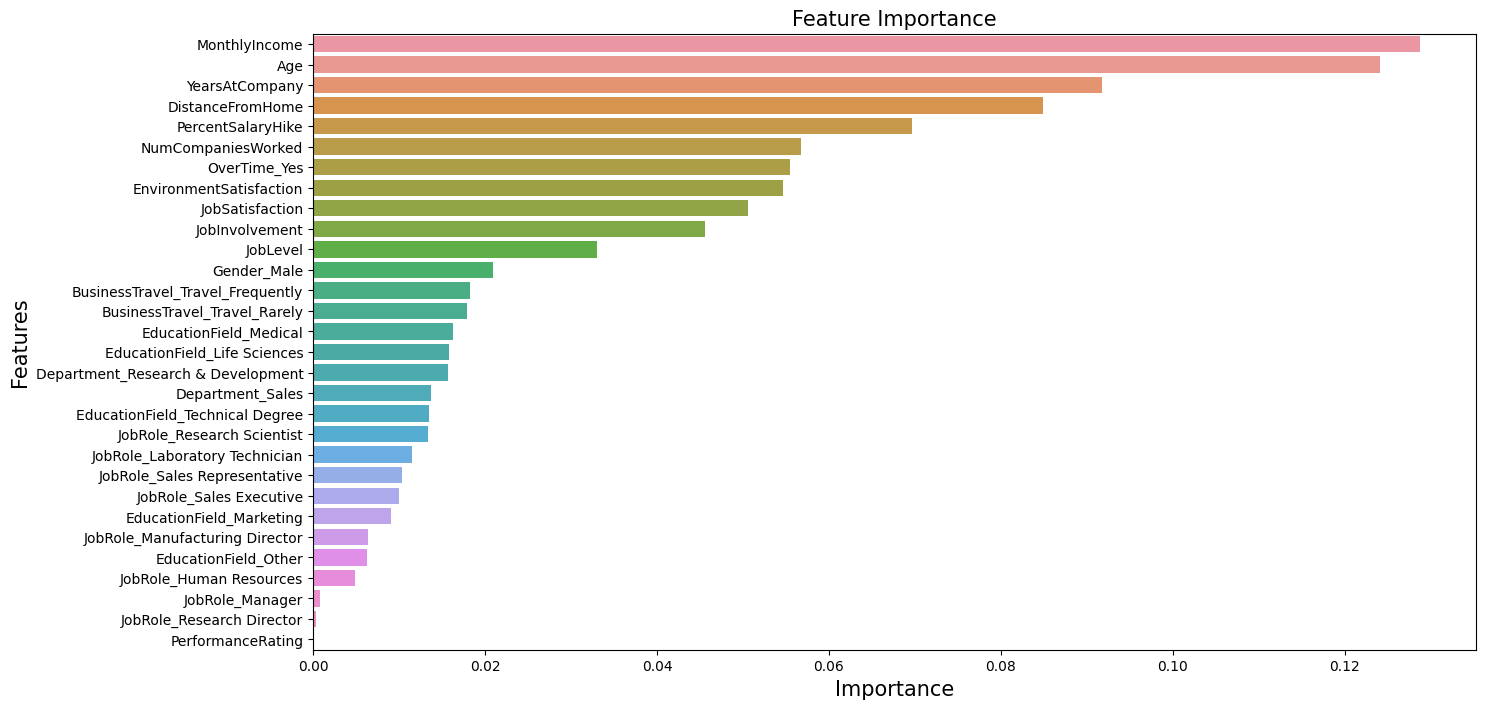

In [81]:
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_tuned_model = RandomForestClassifier(criterion = rf_model.best_params_['criterion'], 
                                                   max_depth = rf_model.best_params_['max_depth'], 
                                                   min_samples_split = rf_model.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model.best_params_['n_estimators'],
                                                   random_state = 10)

# use fit() to fit the model on the train set
random_forest_tuned_model = random_forest_tuned_model.fit(X_train, y_train)

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': random_forest_tuned_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [82]:
random_forest_tuned_model.feature_importances_

array([0.12414499, 0.08489283, 0.05465858, 0.04558386, 0.03296243,
       0.05057724, 0.12878635, 0.05672067, 0.06964268, 0.        ,
       0.09180429, 0.01821475, 0.01788497, 0.01567336, 0.01369943,
       0.01578693, 0.00907674, 0.01623349, 0.00621411, 0.01353204,
       0.02088759, 0.00490604, 0.011467  , 0.00083424, 0.00639243,
       0.0003092 , 0.01331998, 0.00999201, 0.01028565, 0.05551612])

Thus we can see that `MonthlyIncome`, `Age` and `YearsAtCompany` are the most import features when predicting whether or not an employee will leave the company.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
# get the top 10 important columns from the dataframe 'important_features' by using iloc
important_columns = list(important_features['Features'].iloc[:10])

# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_tuned_model = RandomForestClassifier(criterion = rf_model.best_params_['criterion'], 
                                                   max_depth = rf_model.best_params_['max_depth'], 
                                                   min_samples_split = rf_model.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model.best_params_['n_estimators'],
                                                   random_state = 10)

# use fit() to fit the model on the train set
random_forest_tuned_model = random_forest_tuned_model.fit(X_train[important_columns], y_train)

# predict the attrition for test set
y_pred = random_forest_tuned_model.predict(X_test[important_columns])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

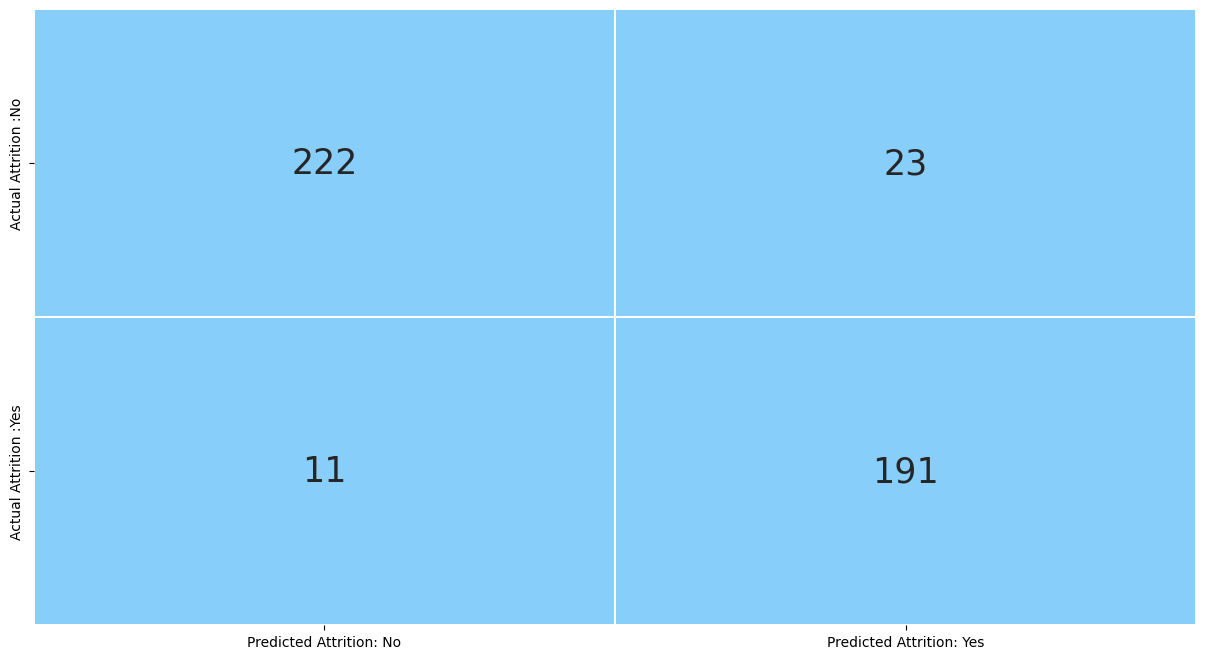

In [84]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

In [85]:
191/210

0.9095238095238095

In [86]:
222/245

0.9061224489795918

In [ ]:
y_test.value_counts()

No     245
Yes    202
Name: Attrition, dtype: int64

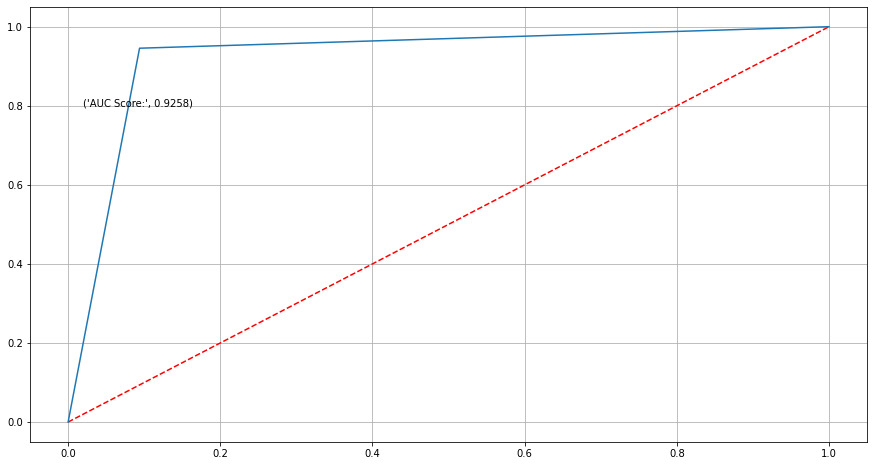

In [ ]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)